In [1]:
import os

# Install YOLOv10
!pip install -q git+https://github.com/THU-MIG/yolov10.git

# FIX SETUP:
# Remove “ray” to avoid the error at the end of the era.
# Reinstall Numpy/Pandas to avoid the initial error
!pip uninstall -y ray
!pip install "numpy<2.0" pandas --force-reinstall

# Download the weights
if not os.path.exists('yolov10n.pt'):
    !wget -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt

print("Setup completato (Run -> Restart & Clear Output)!")
os.environ['WANDB_MODE'] = 'disabled'

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 132.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 156.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.9.0.post0
    Uninstalling python-dateutil-2.9.0.post0:
      Successfully uninst

Setup completato (Run -> Restart & Clear Output)!


In [1]:
# Dataset preparation
import torch
import os
from ultralytics import YOLOv10
import yaml
import glob
import random

from ultralytics import settings
# Disable integration with Ray Tune to avoid the error
settings.update({"raytune": False})

# Patch for Pytorch (Required for Yolov10)
_original_load = torch.load
def safe_load(*args, **kwargs):
    if 'weights_only' not in kwargs:
        kwargs['weights_only'] = False
    return _original_load(*args, **kwargs)
torch.load = safe_load
print("Patch applicata a torch.load.")

# Download
print("Download Dataset VisDrone")
try:
    # Load the template only to activate the automatic download of the yaml
    model_dummy = YOLOv10('yolov10n.pt')

    # This command will fail (Batch=1) but forces the dataset download before crashing.
    model_dummy.train(data='VisDrone.yaml', epochs=1, imgsz=32, batch=1)
except Exception as e:
    print("Tentativo di download terminato (errore atteso, procedo alla verifica).")

# 3. CHECK FOLDER
dataset_path = ''
search_paths = [
    './datasets/VisDrone',
    '../datasets/VisDrone',
    '/kaggle/working/datasets/VisDrone',
    '/content/datasets/VisDrone' # For Colab
]

for path in search_paths:
    if os.path.exists(path):
        dataset_path = path
        break

if not dataset_path:
    raise FileNotFoundError("ERRORE: Non riesco a trovare la cartella VisDrone nemmeno dopo il tentativo di download.")

print(f" SUCCESSO: Dataset trovato in: {dataset_path}")

Patch applicata a torch.load.
Download Dataset VisDrone
New https://pypi.org/project/ultralytics/8.4.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=VisDrone.yaml, epochs=1, time=None, patience=100, batch=1, imgsz=32, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=Non

Converting /content/datasets/VisDrone/VisDrone2019-DET-train: 6471it [00:33, 195.06it/s]
Converting /content/datasets/VisDrone/VisDrone2019-DET-val: 548it [00:04, 114.55it/s]
Converting /content/datasets/VisDrone/VisDrone2019-DET-test-dev: 1610it [00:08, 188.30it/s]

Dataset download success ✅ (96.6s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytic

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 n


wandb: WARNING Invalid choice
wandb: Enter your choice:

 no


wandb: WARNING Invalid choice
wandb: Enter your choice:

wandb: Enter your choice:

 3


wandb: You chose "Don't visualize my results"
wandb: Using W&B in offline mode.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 133MB/s]
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/checks.py:641: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(True):


AMP: checks passed ✅


/usr/local/lib/python3.12/dist-packages/ultralytics/engine/trainer.py:276: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/datasets/VisDrone/VisDrone2019-DET-train/labels... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:03<00:00, 1624.14it/s]

train: WARNING ⚠️ /content/datasets/VisDrone/VisDrone2019-DET-train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/VisDrone/VisDrone2019-DET-train/images/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/VisDrone/VisDrone2019-DET-train/images/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/VisDrone/VisDrone2019-DET-train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed


train: New cache created: /content/datasets/VisDrone/VisDrone2019-DET-train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:846: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
/usr/local/lib/python3.12/dist-packages/albumentations/core/composition.py:331: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()
val: Scanning /content/datasets/VisDrone/VisDrone2019-DET-val/labels... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<00:00, 798.18it/s]


val: New cache created: /content/datasets/VisDrone/VisDrone2019-DET-val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: WARNING ⚠️ TensorBoard graph visualization failure selected index k out of range
Image sizes 32 train, 32 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


  0%|          | 0/6471 [00:00<?, ?it/s]

Tentativo di download terminato (errore atteso, procedo alla verifica).
 SUCCESSO: Dataset trovato in: ./datasets/VisDrone


In [2]:
import numpy
print(f"Versione Numpy attuale: {numpy.__version__}")

Versione Numpy attuale: 1.26.4


In [3]:
import os
import matplotlib.pyplot as plt
from collections import Counter

def analyze_and_plot(image_list, class_map, split_name):
    """
    Count the occurrences of classes from the label files corresponding to the images.
    """
    print(f"⏳ Elaborazione statistiche per lo split: {split_name} ({len(image_list)} immagini)...")

    label_counts = Counter()
    missing_labels = 0

    for img_path in image_list:
        # Build the file label path assuming the standard YOLO structure
        label_path = img_path.replace('/images/', '/labels/').replace('.jpg', '.txt').replace('.png', '.txt')

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) > 0:
                        # The first number is the class ID
                        try:
                            class_id = int(parts[0])
                            label_counts[class_id] += 1
                        except ValueError:
                            pass
        else:
            missing_labels += 1

    if missing_labels > 0:
        print(f"⚠️ Attenzione: {missing_labels} file di etichette non trovati per {split_name}.")

    # Preparing Data for the Graph
    if not label_counts:
        print(f"   Nessun dato trovato per {split_name}. Salto il grafico.")
        return

    # Sort the classes by ID (0, 1, 2...) for consistency between the graphs.
    sorted_ids = sorted(class_map.keys())
    labels = [class_map[cid] for cid in sorted_ids]
    counts = [label_counts[cid] for cid in sorted_ids]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(labels, counts, color='#4c72b0', edgecolor='black', alpha=0.9)

    plt.title(f'Classes Distribution - {split_name} ({len(image_list)} images)', fontsize=14, fontweight='bold')
    plt.xlabel('VisDrone classes', fontsize=12)
    plt.ylabel('Number of Boxes (Instances)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Add the exact numbers above each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

⚙️ Generazione file di configurazione...
 Config creato per 25pct: /content/VisDrone_25pct.yaml
 Config creato per 50pct: /content/VisDrone_50pct.yaml
 Config creato per 100pct: /content/VisDrone_100pct.yaml


⏳ Elaborazione statistiche per lo split: 25pct (1617 immagini)...


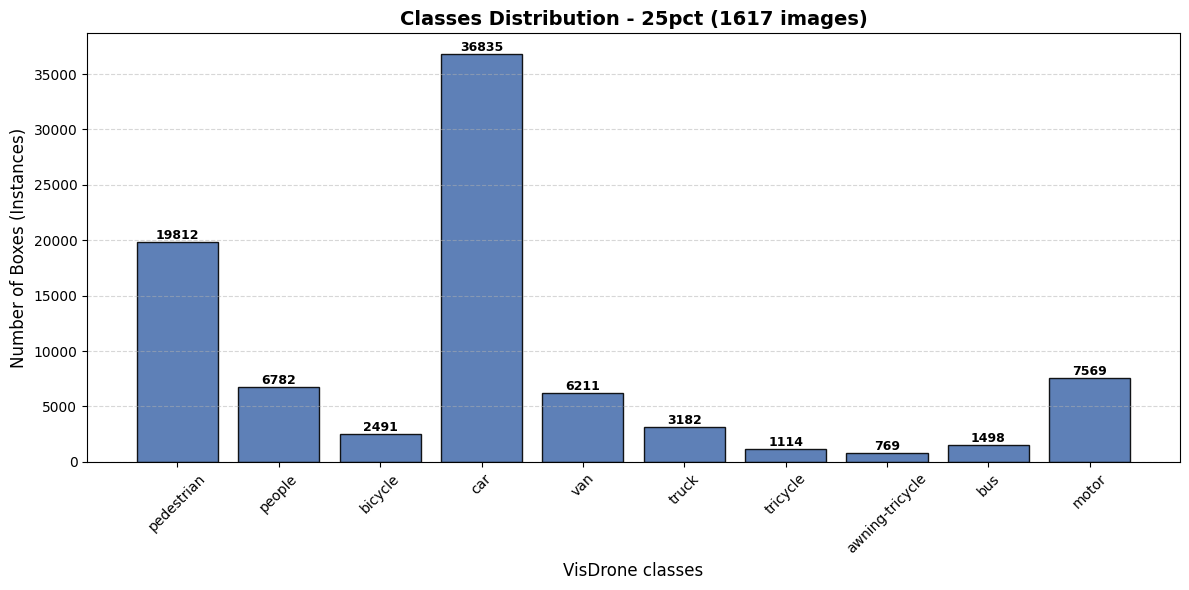

⏳ Elaborazione statistiche per lo split: 50pct (3235 immagini)...


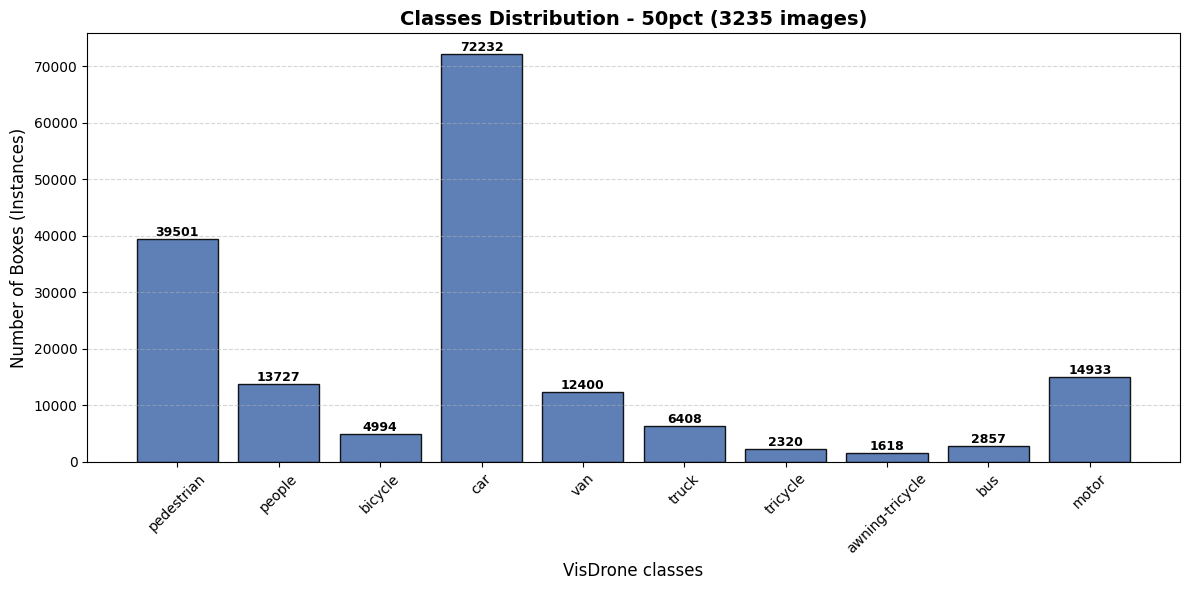

⏳ Elaborazione statistiche per lo split: 100pct (6471 immagini)...


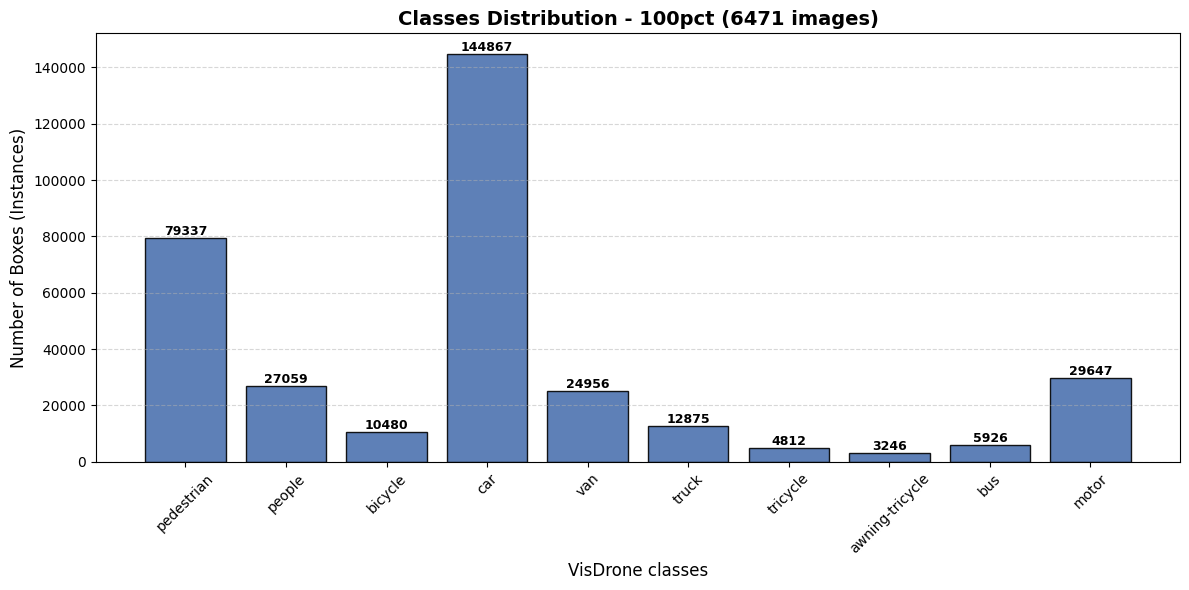

⏳ Elaborazione statistiche per lo split: Validation Set (548 immagini)...


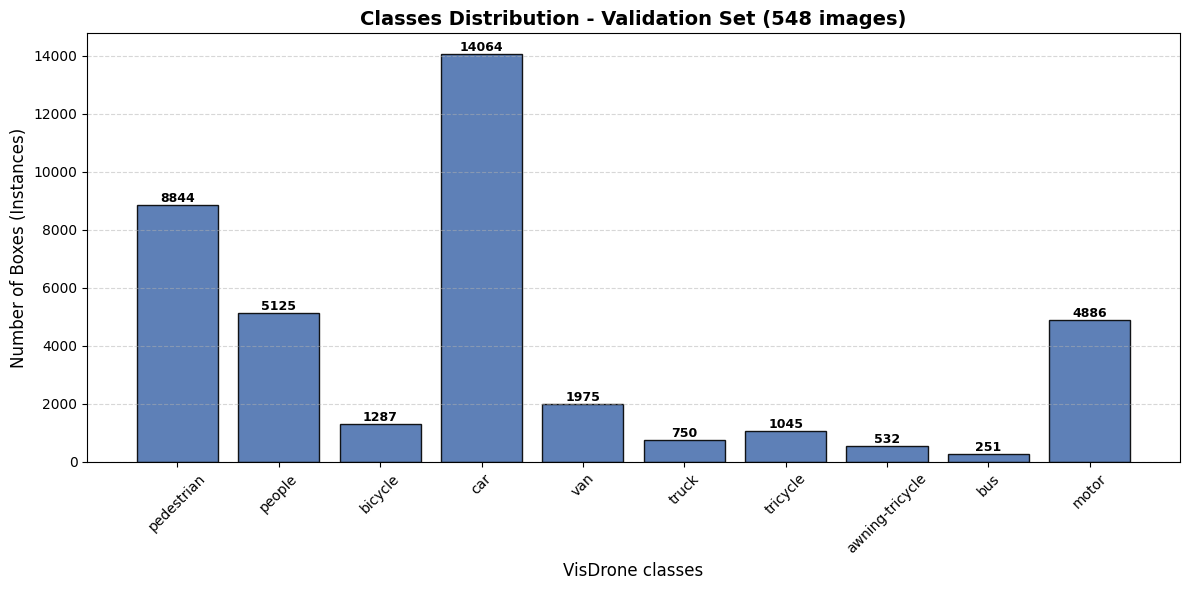

⏳ Elaborazione statistiche per lo split: Test Set (1610 immagini)...


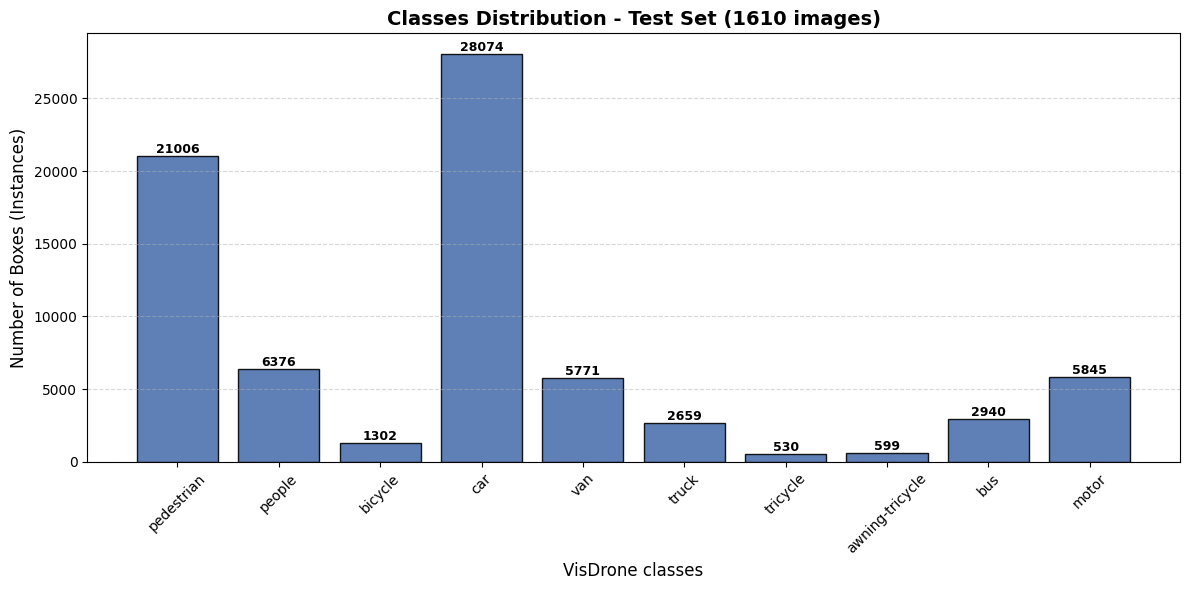

In [4]:
import os
import glob
import random
import yaml

# Image recovery
train_images = glob.glob(os.path.join(dataset_path, 'VisDrone2019-DET-train/images/*.jpg'))
val_images = glob.glob(os.path.join(dataset_path, 'VisDrone2019-DET-val/images/*.jpg'))
test_images = glob.glob(os.path.join(dataset_path, 'VisDrone2019-DET-test-dev/images/*.jpg'))

if not train_images: raise FileNotFoundError(" Train images non trovate!")
if not val_images: print(" Val images non trovate.")
if not test_images: print(" Test images non trovate.")

random.seed(42)
random.shuffle(train_images)

# Split definition
n_total = len(train_images)
train_splits = {
    '25pct': train_images[:int(n_total * 0.25)],
    '50pct': train_images[:int(n_total * 0.5)],
    '100pct': train_images
}

# VisDrone class dictionary
visdrone_classes = {
    0: 'pedestrian', 1: 'people', 2: 'bicycle', 3: 'car', 4: 'van',
    5: 'truck', 6: 'tricycle', 7: 'awning-tricycle', 8: 'bus', 9: 'motor'
}

cwd = os.getcwd()
configs = {}

# Creating configuration files
print("⚙️ Generazione file di configurazione...")
for key, img_list in train_splits.items():
    # Writing txt file with list of train images
    txt_filename = os.path.join(cwd, f'train_{key}.txt')
    with open(txt_filename, 'w') as f:
        f.write('\n'.join(img_list))

    val_txt = os.path.join(cwd, 'val_official.txt')
    test_txt = os.path.join(cwd, 'test_official.txt')

    with open(val_txt, 'w') as f: f.write('\n'.join(val_images))
    with open(test_txt, 'w') as f: f.write('\n'.join(test_images))

    # YAML creation
    yaml_content = {
        'path': cwd,
        'train': txt_filename,
        'val': val_txt,
        'test': test_txt,
        'names': visdrone_classes
    }

    yaml_filename = os.path.join(cwd, f'VisDrone_{key}.yaml')
    with open(yaml_filename, 'w') as f:
        yaml.dump(yaml_content, f)

    configs[key] = yaml_filename
    print(f" Config creato per {key}: {yaml_filename}")

print("\n" + "="*50 + "\n")

# Graph generation
datasets_to_analyze = train_splits.copy()
datasets_to_analyze['Validation Set'] = val_images
datasets_to_analyze['Test Set'] = test_images

# Plot cycle
for set_name, image_list in datasets_to_analyze.items():
    if len(image_list) > 0:
        analyze_and_plot(image_list, visdrone_classes, set_name)
    else:
        print(f" Salto il grafico per {set_name} perché è vuoto.")

In [5]:
import os
import pandas as pd
from collections import Counter
from tqdm.notebook import tqdm

cwd = os.getcwd()
splits = ['25pct', '50pct', '100pct']
visdrone_classes = {
    0: 'pedestrian', 1: 'people', 2: 'bicycle', 3: 'car', 4: 'van',
    5: 'truck', 6: 'tricycle', 7: 'awning-tricycle', 8: 'bus', 9: 'motor'
}

distribution_data = []

print(" Calcolo distribuzione classi per ogni split...")

for split in splits:
    txt_file = os.path.join(cwd, f'train_{split}.txt')

    if not os.path.exists(txt_file):
        print(f"File non trovato: {txt_file}")
        continue

    # Read image list
    with open(txt_file, 'r') as f:
        image_list = [line.strip() for line in f.readlines()]

    print(f"   🔹 Elaborazione {split} ({len(image_list)} immagini)...")

    counts = Counter()

    # Count the labels
    for img_path in tqdm(image_list, leave=False):
        # Path Label (Handles various path formats)
        label_path = img_path.replace('/images/', '/labels/').replace('.jpg', '.txt').replace('.png', '.txt')

        # Fallback if the path is different
        if not os.path.exists(label_path):
             base, ext = os.path.splitext(img_path)
             parts = base.split(os.sep)
             if 'images' in parts:
                 parts[parts.index('images')] = 'labels'
                 label_path = os.sep.join(parts) + '.txt'

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    try:
                        cid = int(line.split()[0])
                        counts[cid] += 1
                    except: pass

    # Add to dataset
    for cid, count in counts.items():
        distribution_data.append({
            'Split': split,
            'Class_ID': cid,
            'Class_Name': visdrone_classes.get(cid, f"Unknown-{cid}"),
            'Instances': count
        })

df_dist = pd.DataFrame(distribution_data)

# Pivot to have Split as columns (easier to read)
df_pivot = df_dist.pivot(index=['Class_ID', 'Class_Name'], columns='Split', values='Instances').fillna(0).astype(int).reset_index()

# Order for ID
df_pivot.sort_values('Class_ID', inplace=True)

filename = 'Distribuzione_Classi_Splits.csv'
df_pivot.to_csv(filename, index=False)

print("\n" + "="*50)
print(f" File salvato: {filename}")
print("="*50)
print(df_pivot)

 Calcolo distribuzione classi per ogni split...
   🔹 Elaborazione 25pct (1617 immagini)...


  0%|          | 0/1617 [00:00<?, ?it/s]

   🔹 Elaborazione 50pct (3235 immagini)...


  0%|          | 0/3235 [00:00<?, ?it/s]

   🔹 Elaborazione 100pct (6471 immagini)...


  0%|          | 0/6471 [00:00<?, ?it/s]


 File salvato: Distribuzione_Classi_Splits.csv
Split  Class_ID       Class_Name  100pct  25pct  50pct
0             0       pedestrian   79337  19812  39501
1             1           people   27059   6782  13727
2             2          bicycle   10480   2491   4994
3             3              car  144867  36835  72232
4             4              van   24956   6211  12400
5             5            truck   12875   3182   6408
6             6         tricycle    4812   1114   2320
7             7  awning-tricycle    3246    769   1618
8             8              bus    5926   1498   2857
9             9            motor   29647   7569  14933
